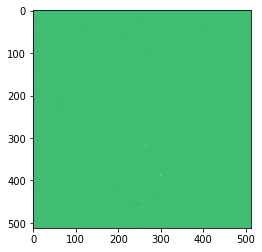

In [3]:
#Problem 4 

import numpy as np
from numpy.fft import fft2, ifft2, fftshift
from matplotlib import pylab as pt

m=512;
n=512;
s=80;

img = np.fromfile('lena.bin',dtype='uint8',count=-1)
img = img.reshape(m,n)

fourier = fft2(img)    # FFT of Original Image


#For Shift Image by 80
def modn(x, M):
    if (0<=x<M):
        return x
    else:
        x = ((x%M)+M)%M
        return x
    
    
imgShift = np.zeros((m,n),dtype='uint8')
for k in range(m):
    for l in range(n):
        imgShift[k][l] =  img[modn(k+s,m)][modn(l+s,n)]


#FFT Of Shifted Image:

FFT_Shift_img = fft2(imgShift)    #FFT of shifted Image by 80 

# Divsion of FFT of Shifted image and FFT Of original Image
Complex_Image = np.divide(FFT_Shift_img, fourier) 

Complex_Image = fftshift(np.log(abs(Complex_Image)))
#print(Complex_Image)

pt.imshow(Complex_Image)